# Import Packages, Functions and Data

In [1]:
import titanlib
import geopandas
import pandas as pd
import netCDF4
import numpy as np

from mpl_toolkits.axes_grid1 import make_axes_locatable
import datetime
import time



# Import custom version of titanlib containing changes
import titanlibcustom



# Import Formatted Data and functions from other Python script
from Data_Importation_and_Function_Definition import ROI_counties, NI_counties, rain_wow, rain_wow_hourly_obs, temp_wow, rain_official, temp_official, isolate_data_of_interest, plot_wow_data

Note: As advised, the Official Rainfall Rate column is currently beign set as equal to the 
Rainfall Accumulation Hourly column


# Obtain Test Data

In [2]:
gdf_temp_wow, gdf_temp_official, gdf_temp_combined = isolate_data_of_interest(day_of_interest="15", 
                                                                              month_of_interest="05",
                                                                              year_of_interest="2021", 
                                                                              time_of_interest="10",
                                                                              type_of_data="Temperature", 
                                                                              add_elevation_bool=True,
                                                                              remove_missing_val=True, 
                                                                              cols_to_remove_missing_val=["Air Temperature"])

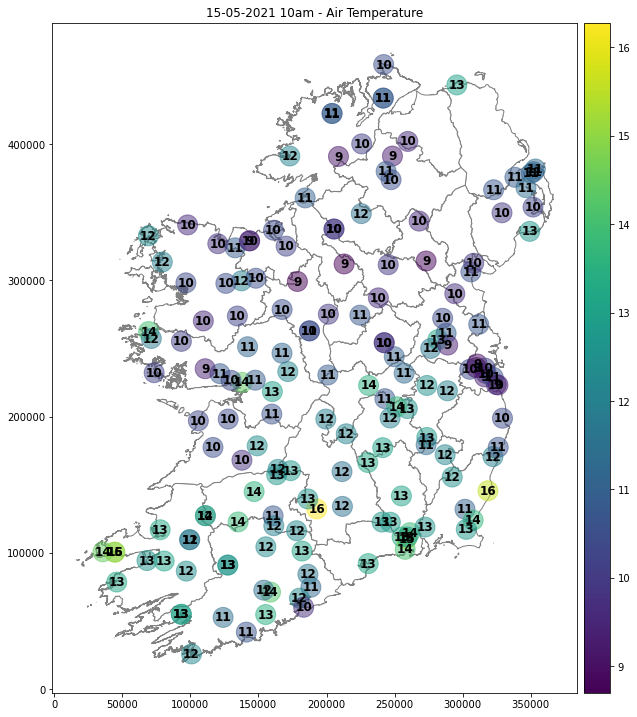

In [3]:
plot_wow_data(gdf_of_interest = gdf_temp_combined, type_of_plot = "Air Temperature", 
              buffer_val = 0, flags = None)

# Range Check

## range_check

In [4]:
np_values = np.array(gdf_temp_combined["Air Temperature"]) # Values you want to check Rainfall/Temp

# We have the choice between defining a global min and max
# Or defining individual min and max values for each station
# (potential use case: Checking measurement is within the ranges of the stations sensor)

global_min = np.array([10.0]) 
global_max = np.array([15.0])

rng = np.random.default_rng(42)
random_min = rng.integers(low = 0, high = 15, size=len(np_values))
random_max = random_min + 10

print("Random Ranges for each individual station:")
print("\n\nMinimum allowed values:\n")
print(random_min)
print("\n\nMaximim allowed values:\n")
print(random_max)

Random Ranges for each individual station:


Minimum allowed values:

[ 1 11  9  6  6 12  1 10  3  1  7 14 11 11 10 11  7  1 12  6  7  5  2 13
 11  9  6 12  8  6  6  3  1  8 13  0 12 12  4  9  2 11 10  5  1 14  6 13
 10 11 11  2  5  7  7  0  8  2 11 10 13 11  5 14  6  4 13  5  1  7 11  2
  6  1 10  7  4  3  8 10 14  6  2 12  9 10  1  4 11 12  6 12 12  5 13  4
  3 10  9  2 12  2 12  0 11 11 11  9  7 10  4 11  8  6  7  8  0  2  3  1
  6 10  9  7 12  8  1 11  8  9  8  8  1  8 11  4  9  0  5  6 14  3  4  6
 14 12  0  3 12  0 12  4 13  4  6  9  1  8  7 11 14  9  6  6  6 12]


Maximim allowed values:

[11 21 19 16 16 22 11 20 13 11 17 24 21 21 20 21 17 11 22 16 17 15 12 23
 21 19 16 22 18 16 16 13 11 18 23 10 22 22 14 19 12 21 20 15 11 24 16 23
 20 21 21 12 15 17 17 10 18 12 21 20 23 21 15 24 16 14 23 15 11 17 21 12
 16 11 20 17 14 13 18 20 24 16 12 22 19 20 11 14 21 22 16 22 22 15 23 14
 13 20 19 12 22 12 22 10 21 21 21 19 17 20 14 21 18 16 17 18 10 12 13 11
 16 20 19 17 22 18 11 21 18 19 1

In [5]:
# Note: this function checks the true value of the observation not the rounded to the nearest whole
# number used for simplicity when plotting

flags = titanlib.range_check(np_values, global_min, global_max)
flags

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int32)

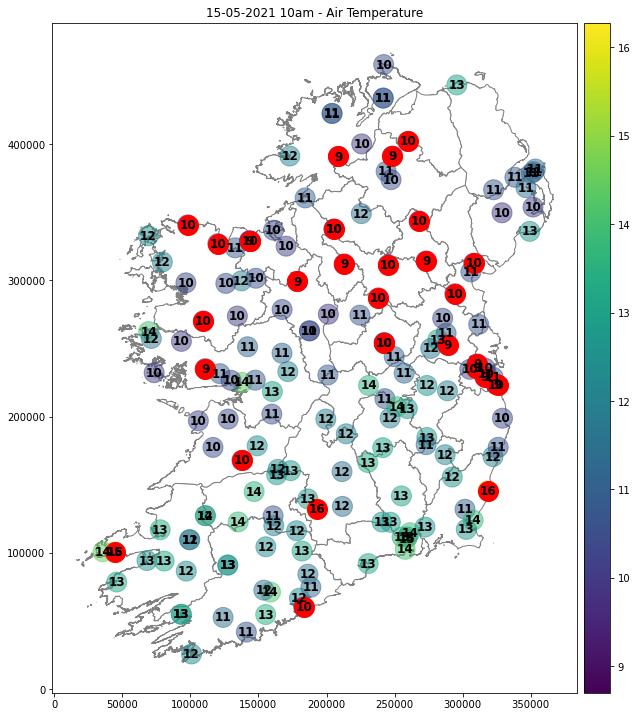

In [6]:
plot_wow_data(gdf_of_interest = gdf_temp_combined, type_of_plot = "Air Temperature", 
              buffer_val = 0, flags = flags)

In [7]:
random_flags = titanlib.range_check(np_values, random_min, random_max)
random_flags

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1], dtype=int32)

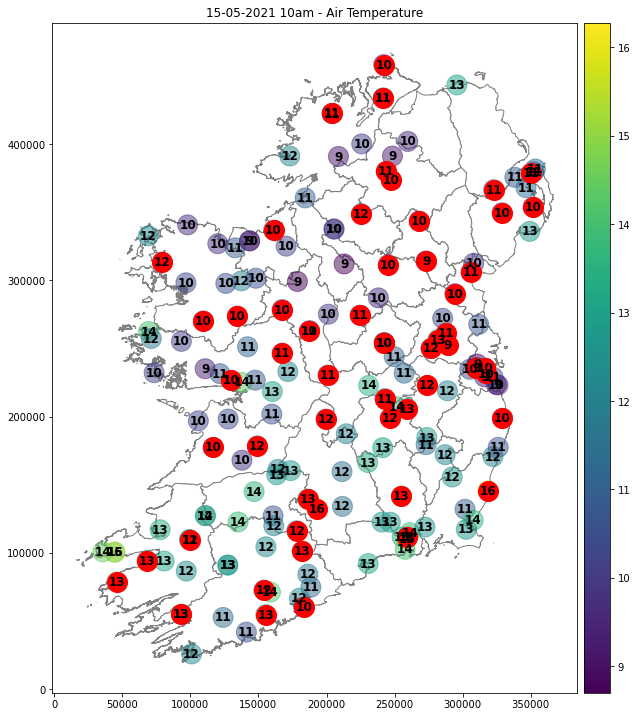

In [8]:
plot_wow_data(gdf_of_interest = gdf_temp_combined, type_of_plot = "Air Temperature", 
              buffer_val = 0, flags = random_flags)

## range_check_climatology

In [9]:
long_np = np.array(gdf_temp_combined["Longitude"])
lat_np = np.array(gdf_temp_combined["Latitude"])

points = titanlib.Points(lat_np, long_np) # Location of each station observation

np_values = np.array(gdf_temp_combined["Air Temperature"]) # Values you want to check Rainfall/Temp


dt = datetime.datetime(year = 2021, month = 5, day = 15, hour = 10)
date_time_of_int = int(time.mktime(dt.timetuple())) # date and time of interest in UNIX integer format


# We have the choice between defining a global neg and pos
# Or defining individual min and max values for each station

pos_above_mean = np.array([2.5]) # Value above the mean climatological value to accept
neg_below_mean = np.array([-2.5]) # Value above the mean climatological value to accept

In [10]:
flags = titanlib.range_check_climatology(points, np_values, date_time_of_int, pos_above_mean, neg_below_mean)
flags

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int32)

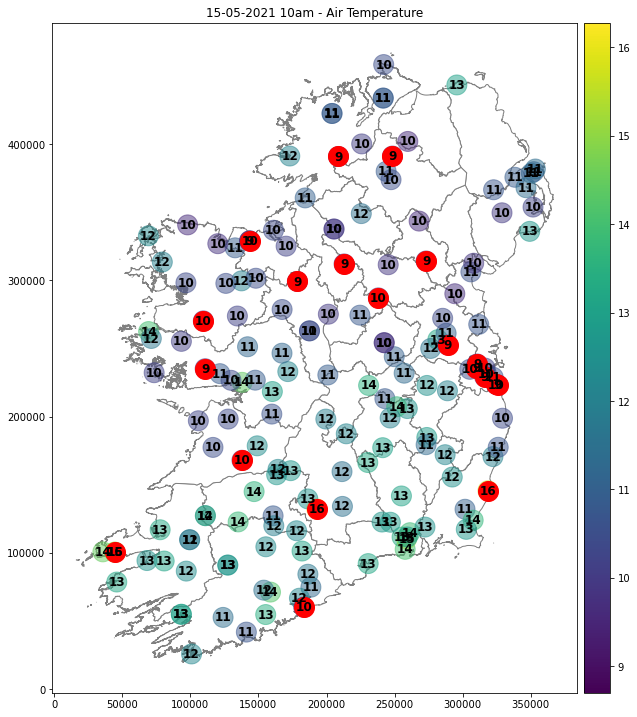

In [11]:
plot_wow_data(gdf_of_interest = gdf_temp_combined, type_of_plot = "Air Temperature", 
              buffer_val = 0, flags = flags)

## Exploration of the Mean temperature calculated by titanlib range_check_climatology

In [12]:
# Note the code for titanlibcustom has been adjusted to return the mean temperature rather than the flag
custom_points = titanlibcustom.Points(lat_np, long_np)


dt = datetime.datetime(year = 2021, month = 5, day = 15, hour = 10)
date_time_of_int = int(time.mktime(dt.timetuple())) # date and time of interest in UNIX integer format

custom_flags = titanlibcustom.range_check_climatology(custom_points, np_values,  date_time_of_int, 
                                                      pos_above_mean, neg_below_mean)
print("Mean temperature value for each station position for this time of year\n")
print(custom_flags)


dt = datetime.datetime(year = 2021, month = 12, day = 15, hour = 10) # What if it was Winter instead?
date_time_of_int = int(time.mktime(dt.timetuple())) # date and time of interest in UNIX integer format

custom_flags_winter = titanlibcustom.range_check_climatology(custom_points, np_values,  date_time_of_int,
                                                             pos_above_mean, neg_below_mean)
print("\n\nMean temperature value for each station position for some time in the winter\n")
print(custom_flags_winter)

Mean temperature value for each station position for this time of year

[12 12 11 12 11 12 13 12 12 11 12 12 11 12 12 11 12 12 11 12 11 12 11 11
 11 12 11 11 11 12 12 12 12 12 12 12 12 12 12 12 11 11 11 12 13 12 12 12
 12 12 12 12 12 12 12 12 12 12 11 13 12 12 12 12 12 12 11 12 12 11 12 12
 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 11 13 12 12 12 13 12
 12 12 12 12 12 12 12 12 11 12 12 12 12 12 12 12 12 12 11 12 12 12 12 12
 11 12 12 13 12 13 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 11 12 12
 12 11 11 11 11 12 12 12 12 13 12 12 12 12 12 12 12 12 11 11 11 11]


Mean temperature value for each station position for some time in the winter

[ 0  0  0  0  0  0  1  1  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  1  0  0  0  0  0  0  1  0  0  0  0  0  0  1  0  1  1
  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  1  0  0  0  0  0  0  1  0  0  0  1  0  0  0  1  1
  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  

In [13]:
test_gdf = gdf_temp_combined.copy()

test_gdf["Mean Temp"] = custom_flags
test_gdf["Winter Mean Temp"] = custom_flags_winter

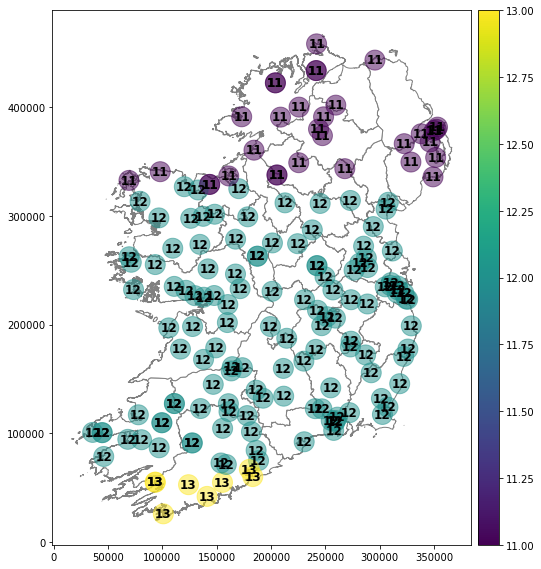

In [14]:
ax = ROI_counties["geometry"].plot(figsize=(8,10), edgecolors="grey", color="w")
divider = make_axes_locatable(ax) # for vertically aligning the plot and the legend
NI_counties["geometry"].plot(ax=ax, edgecolors="grey", color="w")  

cax = divider.append_axes("right", size="5%", pad=0.1)



##### Plot Markers #####
test_gdf.plot("Mean Temp", ax=ax, legend = True, cax=cax, markersize=400, alpha = 0.5)

# Annotate each marker with the Rainfall Accumulation to the nearest whole number
for x, y, label in zip(test_gdf.geometry.x, test_gdf.geometry.y, test_gdf["Mean Temp"]):
    ax.annotate(round(label), xy=(x, y), verticalalignment='center', horizontalalignment='center', 
                weight = "bold", fontsize = "large")

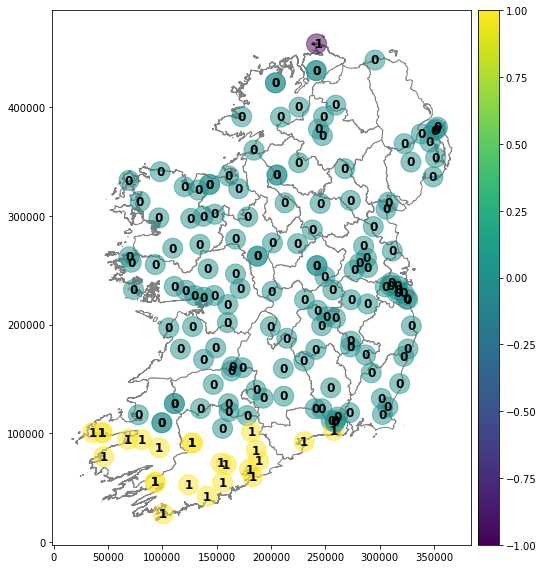

In [15]:
ax = ROI_counties["geometry"].plot(figsize=(8,10), edgecolors="grey", color="w")
divider = make_axes_locatable(ax) # for vertically aligning the plot and the legend
NI_counties["geometry"].plot(ax=ax, edgecolors="grey", color="w")  

cax = divider.append_axes("right", size="5%", pad=0.1)



##### Plot Markers #####
test_gdf.plot("Winter Mean Temp", ax=ax, legend = True, cax=cax, markersize=400, alpha = 0.5)

# Annotate each marker with the Rainfall Accumulation to the nearest whole number
for x, y, label in zip(test_gdf.geometry.x, test_gdf.geometry.y, test_gdf["Winter Mean Temp"]):
    ax.annotate(round(label), xy=(x, y), verticalalignment='center', horizontalalignment='center', 
                weight = "bold", fontsize = "large")